In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_Forest_Fires_cleanedd_Dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
## drop month ,day,year
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
##Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1 )

In [11]:
df.tail( )

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
df['Classes'].value_counts( )

Classes
1    137
0    105
Name: count, dtype: int64

In [14]:
## Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [16]:
X.head( )

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [17]:
y 

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [18]:
## Train Test Split
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

In [20]:
## Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.649167,-0.304268,-0.327352,0.699962,0.491871,0.375234,0.615306,0.463953,0.522840,0.253221
RH,-0.649167,1.000000,0.265648,0.230598,-0.633707,-0.413434,-0.245585,-0.693544,-0.363609,-0.434496,-0.371126
Ws,-0.304268,0.265648,1.000000,0.228402,-0.169312,0.002254,0.106542,0.007255,0.040539,-0.057217,-0.223395
Rain,-0.327352,0.230598,0.228402,1.000000,-0.537389,-0.280440,-0.294730,-0.340539,-0.291583,-0.379432,-0.073958
FFMC,0.699962,-0.633707,-0.169312,-0.537389,1.000000,0.621288,0.537798,0.751627,0.610779,0.780836,0.238978
DMC,0.491871,-0.413434,0.002254,-0.280440,0.621288,1.000000,0.876726,0.693431,0.983700,0.613550,0.207324
DC,0.375234,-0.245585,0.106542,-0.294730,0.537798,0.876726,1.000000,0.548969,0.946984,0.546399,-0.071980
ISI,0.615306,-0.693544,0.007255,-0.340539,0.751627,0.693431,0.548969,1.000000,0.659602,0.749722,0.276977
BUI,0.463953,-0.363609,0.040539,-0.291583,0.610779,0.983700,0.946984,0.659602,1.000000,0.609727,0.107121
Classes,0.522840,-0.434496,-0.057217,-0.379432,0.780836,0.613550,0.546399,0.749722,0.609727,1.000000,0.173770


<Axes: >

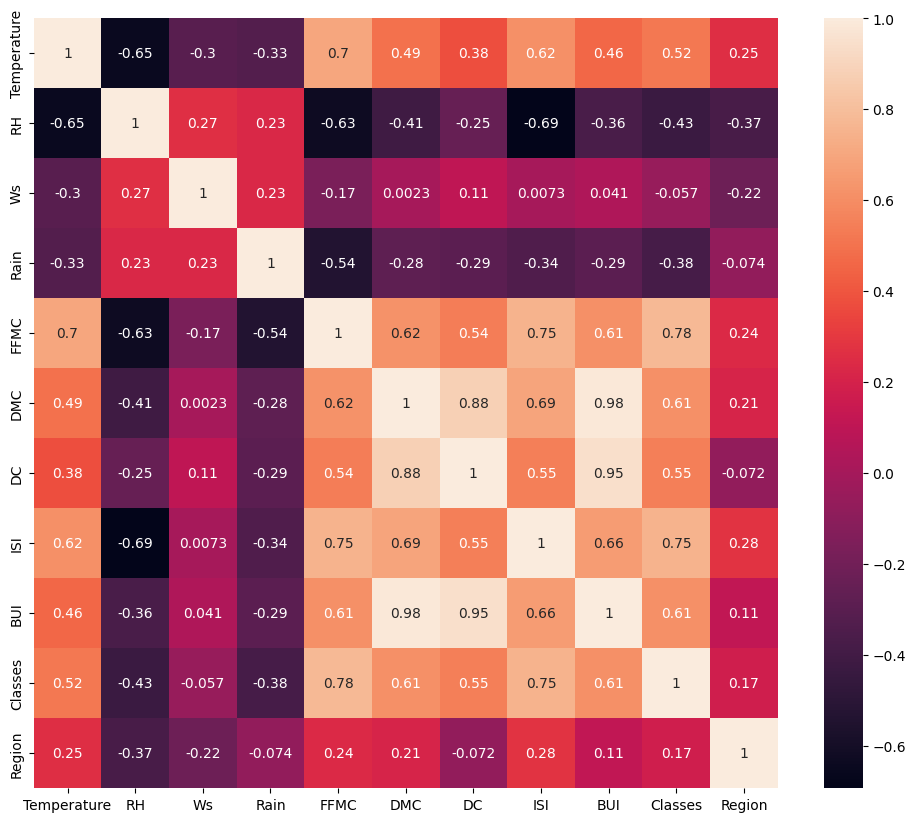

In [21]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True )

In [22]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.649167,-0.304268,-0.327352,0.699962,0.491871,0.375234,0.615306,0.463953,0.522840,0.253221
RH,-0.649167,1.000000,0.265648,0.230598,-0.633707,-0.413434,-0.245585,-0.693544,-0.363609,-0.434496,-0.371126
Ws,-0.304268,0.265648,1.000000,0.228402,-0.169312,0.002254,0.106542,0.007255,0.040539,-0.057217,-0.223395
Rain,-0.327352,0.230598,0.228402,1.000000,-0.537389,-0.280440,-0.294730,-0.340539,-0.291583,-0.379432,-0.073958
FFMC,0.699962,-0.633707,-0.169312,-0.537389,1.000000,0.621288,0.537798,0.751627,0.610779,0.780836,0.238978
DMC,0.491871,-0.413434,0.002254,-0.280440,0.621288,1.000000,0.876726,0.693431,0.983700,0.613550,0.207324
DC,0.375234,-0.245585,0.106542,-0.294730,0.537798,0.876726,1.000000,0.548969,0.946984,0.546399,-0.071980
ISI,0.615306,-0.693544,0.007255,-0.340539,0.751627,0.693431,0.548969,1.000000,0.659602,0.749722,0.276977
BUI,0.463953,-0.363609,0.040539,-0.291583,0.610779,0.983700,0.946984,0.659602,1.000000,0.609727,0.107121
Classes,0.522840,-0.434496,-0.057217,-0.379432,0.780836,0.613550,0.546399,0.749722,0.609727,1.000000,0.173770


In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i  in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix. iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
    return col_corr

In [25]:
## threshold--Domain expertise
corr_features  = correlation(X_train,0.85)

In [27]:
corr_features

{'BUI', 'DC'}

In [26]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

#### Feature Scalling OR Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [31]:
X_train_scaled

array([[-0.83204305,  0.75414469,  1.27336969, ..., -0.60658617,
        -1.07459849, -0.97274691],
       [-0.03098033, -0.52281424, -0.51885359, ...,  0.08124507,
         0.93058013,  1.02801663],
       [-0.83204305, -1.46373135, -2.66952153, ..., -0.46427625,
         0.93058013,  1.02801663],
       ...,
       [-1.90012668,  0.88856142,  0.55648038, ..., -1.05723422,
        -1.07459849, -0.97274691],
       [ 1.03710331, -0.45560588,  0.19803572, ...,  0.84023126,
         0.93058013,  1.02801663],
       [-0.56502214,  0.95576978,  1.990259  , ..., -0.84376935,
        -1.07459849, -0.97274691]])

#### Box Plots to understand Effect of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

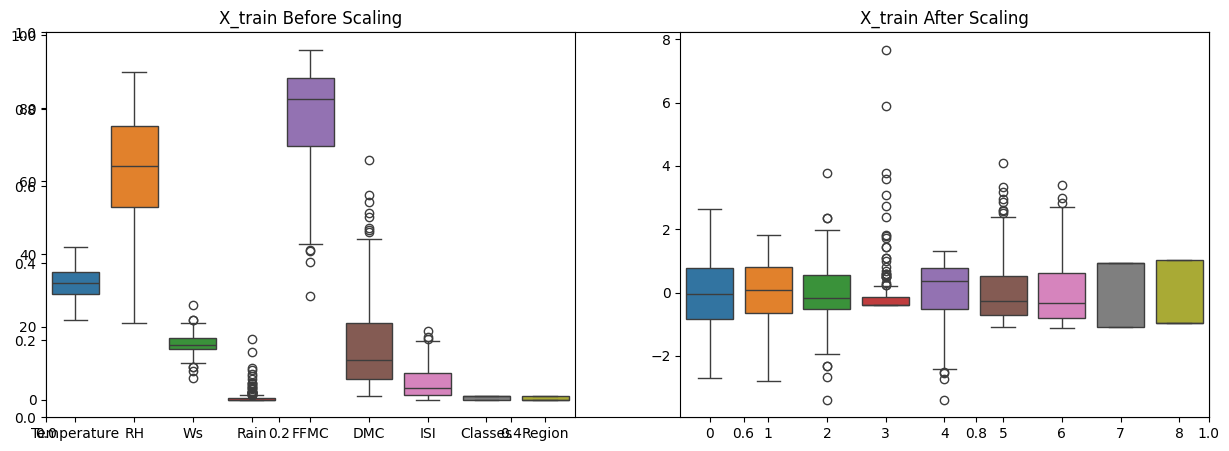

In [33]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

#### Linear Regression Model


Mean absolute error 0.8510398575943611
R2 Score 0.9754934092645953


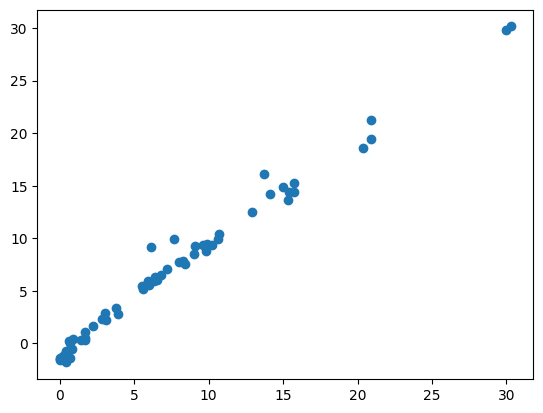

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#### Lasso Regression

Mean absolute error 0.984494627224081
R2 Score 0.9576592903330443


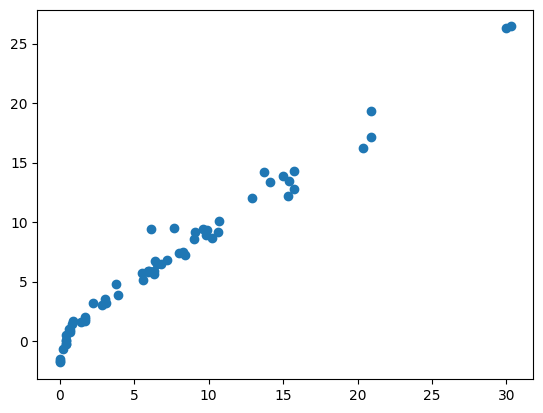

In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#### Cross Validation

In [36]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train) 

LassoCV(cv=5)

In [37]:
lassocv.alpha_

np.float64(0.06481103951672902)

In [38]:
lassocv.alphas_


array([6.94947533, 6.48110395, 6.04429924, 5.6369337 , 5.25702323,
       4.90271746, 4.57229071, 4.26413362, 3.97674529, 3.70872596,
       3.45877025, 3.22566071, 3.00826197, 2.80551518, 2.61643285,
       2.44009403, 2.27563986, 2.12226935, 1.9792355 , 1.84584165,
       1.7214381 , 1.60541894, 1.49721907, 1.39631152, 1.3022048 ,
       1.21444055, 1.13259132, 1.05625846, 0.98507017, 0.91867974,
       0.8567638 , 0.79902079, 0.74516946, 0.69494753, 0.6481104 ,
       0.60442992, 0.56369337, 0.52570232, 0.49027175, 0.45722907,
       0.42641336, 0.39767453, 0.3708726 , 0.34587702, 0.32256607,
       0.3008262 , 0.28055152, 0.26164329, 0.2440094 , 0.22756399,
       0.21222694, 0.19792355, 0.18458417, 0.17214381, 0.16054189,
       0.14972191, 0.13963115, 0.13022048, 0.12144406, 0.11325913,
       0.10562585, 0.09850702, 0.09186797, 0.08567638, 0.07990208,
       0.07451695, 0.06949475, 0.06481104, 0.06044299, 0.05636934,
       0.05257023, 0.04902717, 0.04572291, 0.04264134, 0.03976

In [39]:
lassocv.mse_path_

array([[54.83966454, 59.07855795, 38.73005119, 78.24916791, 53.00661707],
       [48.33100151, 52.98238939, 33.40328524, 76.17370919, 47.37592787],
       [42.48962873, 46.94732259, 28.61218248, 69.11179183, 42.46600092],
       [37.38863118, 41.62232808, 24.53743278, 62.88571919, 38.18380814],
       [32.93304972, 36.95506088, 21.07947528, 57.39228141, 33.53767827],
       [29.04003967, 32.8621846 , 18.15219956, 52.54133041, 29.1493467 ],
       [25.63743433, 29.27101667, 15.68105333, 48.25410422, 25.34338775],
       [22.66265342, 26.11857183, 13.60159507, 43.16319869, 22.04293718],
       [20.06092485, 23.3495426 , 11.85806577, 37.98662715, 19.18230634],
       [17.78462971, 20.91582143, 10.40237912, 33.46710858, 16.70314498],
       [15.79228608, 18.77544333,  9.19293018, 29.52061945, 14.55516824],
       [14.04766014, 16.89166699,  8.19382936, 26.07282652, 12.69468152],
       [12.51946279, 15.23281282,  7.37411896, 23.06125733, 11.08371907],
       [11.18014459, 13.77084152,  6.7

Mean absolute error 0.8511284177810373
R2 Score 0.9740841254014521


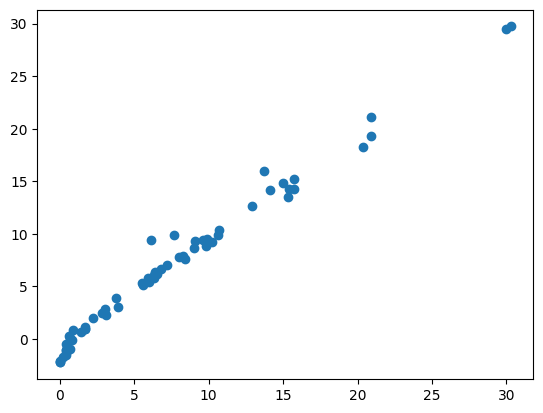

In [40]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

#### Ridge Regression model

Mean absolute error 0.8499808253500521
R2 Score 0.9752463612865698


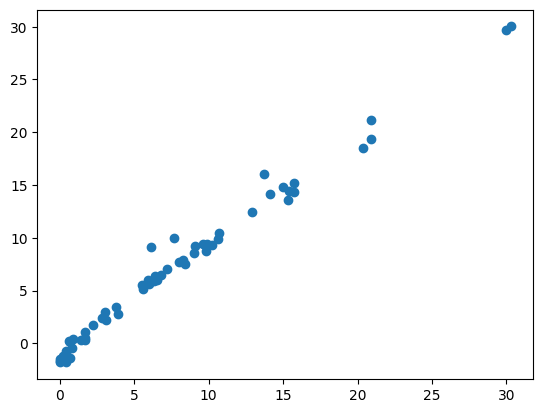

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.9409722329392259
R2 Score 0.969611291359476


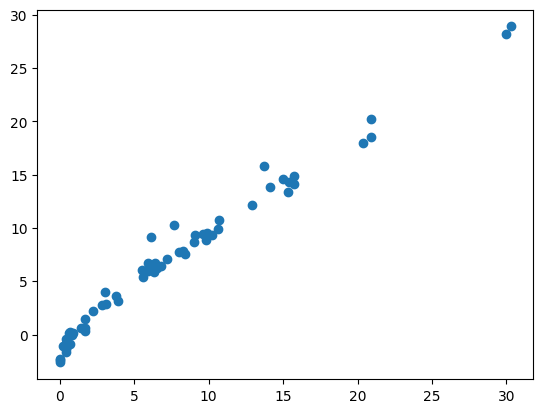

In [42]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [43]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

#### Elasticnet Regression

Mean absolute error 1.602449598013582
R2 Score 0.8861802152125718


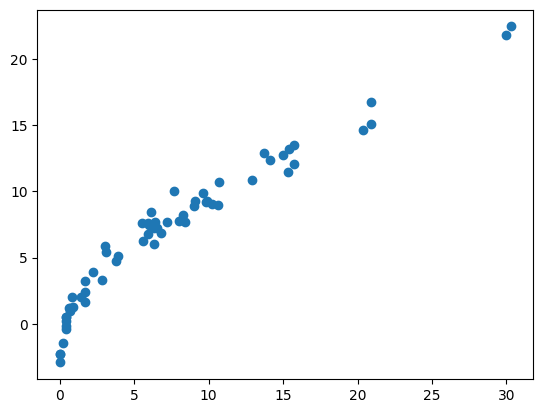

In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.8682636144138886
R2 Score 0.9735371908038492


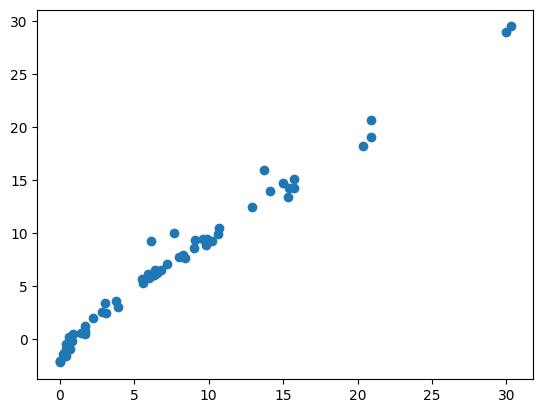

In [45]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [46]:
elasticcv.alphas_

array([13.89895066, 12.9622079 , 12.08859847, 11.2738674 , 10.51404647,
        9.80543492,  9.14458143,  8.52826724,  7.95349058,  7.41745193,
        6.9175405 ,  6.45132142,  6.01652395,  5.61103037,  5.2328657 ,
        4.88018807,  4.55127972,  4.2445387 ,  3.958471  ,  3.6916833 ,
        3.44287621,  3.21083787,  2.99443815,  2.79262304,  2.60440959,
        2.4288811 ,  2.26518264,  2.11251691,  1.97014035,  1.83735948,
        1.7135276 ,  1.59804157,  1.49033892,  1.38989507,  1.29622079,
        1.20885985,  1.12738674,  1.05140465,  0.98054349,  0.91445814,
        0.85282672,  0.79534906,  0.74174519,  0.69175405,  0.64513214,
        0.60165239,  0.56110304,  0.52328657,  0.48801881,  0.45512797,
        0.42445387,  0.3958471 ,  0.36916833,  0.34428762,  0.32108379,
        0.29944381,  0.2792623 ,  0.26044096,  0.24288811,  0.22651826,
        0.21125169,  0.19701403,  0.18373595,  0.17135276,  0.15980416,
        0.14903389,  0.13898951,  0.12962208,  0.12088598,  0.11

In [47]:
## Pickle the machine learning models, preprocessing model standarscalar
scaler

StandardScaler()

In [48]:
ridge

Ridge()

In [49]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))